In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import copy
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
data = pd.read_pickle('./Desktop/Kaggle_study/Jicbang/jicbang_data')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605376 entries, 0 to 1605375
Data columns (total 59 columns):
key                                   1605376 non-null int64
apartment_id                          1605376 non-null int64
city                                  1605376 non-null object
transaction_date                      1605376 non-null int64
year_of_completion                    1605376 non-null int64
exclusive_use_area                    1605376 non-null float64
floor                                 1605376 non-null int64
latitude                              1605376 non-null float64
longitude                             1605376 non-null float64
address_by_law                        1605376 non-null object
total_parking_capacity_in_site        1605376 non-null float64
total_household_count_in_sites        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
tallest_building_in_sites             1605376 non-null float64
lowest_building_in_si

# Ligth GBM

- Categorical variable 설정
- train, valid set으로 구분


In [8]:
category_cols = ['apartment_id','city','address_by_law','heat_type','heat_fuel','room_id','front_door_structure',
                 'closest_station','ci_gun','ci_gun_eup','element_school','middle_school','high_school', 'element_school_type',
                'middle_school_type','high_school_type','middle_school_gender','high_school_gender','high_school_name',
                 'transaction_year','transaction_month']
for col in category_cols:
    data[col] = data[col].astype('category')

data = data.drop('key', axis =1)
train = data.loc[data.transaction_real_price>0]
test = data.loc[data.transaction_real_price==0]
train_target = train.transaction_real_price
train_x = train.drop('transaction_real_price', axis =1)
test_target = test.transaction_real_price
test_x = test.drop('transaction_real_price', axis =1)
train_x, valid_x, train_target,valid_target=train_test_split(train_x, train_target, random_state=99)

In [6]:
import lightgbm as lgb 

fit_params={"early_stopping_rounds":40, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(train_x,train_target)],
            'eval_names': ['valid'],
            'verbose': 10,
            
            'feature_name': 'auto', # that's actually the default
           
            'categorical_feature': 'auto' # that's actually the default
            
            
           }

clf = lgb.LGBMRegressor(num_leaves= 500, max_depth=-1, 
                        boosting_type = 'gbdt',#gbdt
                         random_state=99, 
                         silent=True, 
                          metric = 'rmse',
                         objective='regression',
                         n_jobs=-1, 
                         n_estimators=500,
                         colsample_bytree=0.6,
                         subsample_freq= 0,
                         subsample=0.6,
                        reg_alpha=10,
                        num_iterations=20000,
                        
                        reg_lambda=0,
                        max_bin=1500,
                         min_child_samples=40,
                         learning_rate=0.1)
#clf.fit(train_x, train_target, **fit_params)


In [30]:
train = data.loc[data.transaction_real_price>0]
test = data.loc[data.transaction_real_price==0]
train_target = train.transaction_real_price
train_x = train.drop('transaction_real_price', axis =1)
test_target = test.transaction_real_price
test_x = test.drop('transaction_real_price', axis =1)


In [8]:
clf.fit(train_x, train_target, **fit_params)


C:\Users\user\PYTHON\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 40 rounds.
[10]	valid's rmse: 1.26313e+08
[20]	valid's rmse: 6.13858e+07
[30]	valid's rmse: 4.15477e+07
[40]	valid's rmse: 3.49921e+07
[50]	valid's rmse: 3.18489e+07
[60]	valid's rmse: 2.98347e+07
[70]	valid's rmse: 2.84226e+07
[80]	valid's rmse: 2.73675e+07
[90]	valid's rmse: 2.64906e+07
[100]	valid's rmse: 2.57542e+07
[110]	valid's rmse: 2.50975e+07
[120]	valid's rmse: 2.45577e+07
[130]	valid's rmse: 2.40516e+07
[140]	valid's rmse: 2.35939e+07
[150]	valid's rmse: 2.3202e+07
[160]	valid's rmse: 2.28623e+07
[170]	valid's rmse: 2.25326e+07
[180]	valid's rmse: 2.22456e+07
[190]	valid's rmse: 2.20043e+07
[200]	valid's rmse: 2.1751e+07
[210]	valid's rmse: 2.15447e+07
[220]	valid's rmse: 2.13542e+07
[230]	valid's rmse: 2.11722e+07
[240]	valid's rmse: 2.09668e+07
[250]	valid's rmse: 2.07902e+07
[260]	valid's rmse: 2.06194e+07
[270]	valid's rmse: 2.04733e+07
[280]	valid's rmse: 2.03228e+07
[290]	valid's rmse: 2.02057e+07
[300]	valid's rmse: 2

[2520]	valid's rmse: 1.18513e+07
[2530]	valid's rmse: 1.18357e+07
[2540]	valid's rmse: 1.18176e+07
[2550]	valid's rmse: 1.18006e+07
[2560]	valid's rmse: 1.17856e+07
[2570]	valid's rmse: 1.17654e+07
[2580]	valid's rmse: 1.17481e+07
[2590]	valid's rmse: 1.17327e+07
[2600]	valid's rmse: 1.17184e+07
[2610]	valid's rmse: 1.16976e+07
[2620]	valid's rmse: 1.16796e+07
[2630]	valid's rmse: 1.16642e+07
[2640]	valid's rmse: 1.16475e+07
[2650]	valid's rmse: 1.16289e+07
[2660]	valid's rmse: 1.16139e+07
[2670]	valid's rmse: 1.15985e+07
[2680]	valid's rmse: 1.15809e+07
[2690]	valid's rmse: 1.15669e+07
[2700]	valid's rmse: 1.15538e+07
[2710]	valid's rmse: 1.1543e+07
[2720]	valid's rmse: 1.15299e+07
[2730]	valid's rmse: 1.15129e+07
[2740]	valid's rmse: 1.14963e+07
[2750]	valid's rmse: 1.14829e+07
[2760]	valid's rmse: 1.14712e+07
[2770]	valid's rmse: 1.14573e+07
[2780]	valid's rmse: 1.14442e+07
[2790]	valid's rmse: 1.14335e+07
[2800]	valid's rmse: 1.14195e+07
[2810]	valid's rmse: 1.14062e+07
[2820]	vali

[5020]	valid's rmse: 9.07558e+06
[5030]	valid's rmse: 9.06732e+06
[5040]	valid's rmse: 9.05893e+06
[5050]	valid's rmse: 9.05132e+06
[5060]	valid's rmse: 9.04134e+06
[5070]	valid's rmse: 9.03432e+06
[5080]	valid's rmse: 9.02734e+06
[5090]	valid's rmse: 9.02078e+06
[5100]	valid's rmse: 9.01481e+06
[5110]	valid's rmse: 9.00482e+06
[5120]	valid's rmse: 8.9961e+06
[5130]	valid's rmse: 8.98908e+06
[5140]	valid's rmse: 8.98205e+06
[5150]	valid's rmse: 8.97383e+06
[5160]	valid's rmse: 8.96634e+06
[5170]	valid's rmse: 8.95957e+06
[5180]	valid's rmse: 8.95128e+06
[5190]	valid's rmse: 8.94466e+06
[5200]	valid's rmse: 8.93646e+06
[5210]	valid's rmse: 8.93113e+06
[5220]	valid's rmse: 8.92168e+06
[5230]	valid's rmse: 8.91366e+06
[5240]	valid's rmse: 8.90642e+06
[5250]	valid's rmse: 8.89539e+06
[5260]	valid's rmse: 8.88901e+06
[5270]	valid's rmse: 8.88209e+06
[5280]	valid's rmse: 8.87279e+06
[5290]	valid's rmse: 8.86554e+06
[5300]	valid's rmse: 8.85926e+06
[5310]	valid's rmse: 8.85136e+06
[5320]	vali

[7510]	valid's rmse: 7.54496e+06
[7520]	valid's rmse: 7.5404e+06
[7530]	valid's rmse: 7.53671e+06
[7540]	valid's rmse: 7.53101e+06
[7550]	valid's rmse: 7.52613e+06
[7560]	valid's rmse: 7.5207e+06
[7570]	valid's rmse: 7.51704e+06
[7580]	valid's rmse: 7.51311e+06
[7590]	valid's rmse: 7.50956e+06
[7600]	valid's rmse: 7.50435e+06
[7610]	valid's rmse: 7.5002e+06
[7620]	valid's rmse: 7.49603e+06
[7630]	valid's rmse: 7.49209e+06
[7640]	valid's rmse: 7.48742e+06
[7650]	valid's rmse: 7.48305e+06
[7660]	valid's rmse: 7.47741e+06
[7670]	valid's rmse: 7.47308e+06
[7680]	valid's rmse: 7.46901e+06
[7690]	valid's rmse: 7.4635e+06
[7700]	valid's rmse: 7.45883e+06
[7710]	valid's rmse: 7.45399e+06
[7720]	valid's rmse: 7.44816e+06
[7730]	valid's rmse: 7.44244e+06
[7740]	valid's rmse: 7.43816e+06
[7750]	valid's rmse: 7.433e+06
[7760]	valid's rmse: 7.42754e+06
[7770]	valid's rmse: 7.4204e+06
[7780]	valid's rmse: 7.41543e+06
[7790]	valid's rmse: 7.41023e+06
[7800]	valid's rmse: 7.40473e+06
[7810]	valid's rm

[10010]	valid's rmse: 6.51807e+06
[10020]	valid's rmse: 6.51498e+06
[10030]	valid's rmse: 6.51181e+06
[10040]	valid's rmse: 6.50918e+06
[10050]	valid's rmse: 6.50559e+06
[10060]	valid's rmse: 6.50234e+06
[10070]	valid's rmse: 6.49933e+06
[10080]	valid's rmse: 6.49561e+06
[10090]	valid's rmse: 6.4915e+06
[10100]	valid's rmse: 6.48787e+06
[10110]	valid's rmse: 6.48476e+06
[10120]	valid's rmse: 6.48144e+06
[10130]	valid's rmse: 6.47768e+06
[10140]	valid's rmse: 6.47332e+06
[10150]	valid's rmse: 6.46996e+06
[10160]	valid's rmse: 6.46651e+06
[10170]	valid's rmse: 6.46296e+06
[10180]	valid's rmse: 6.46003e+06
[10190]	valid's rmse: 6.45746e+06
[10200]	valid's rmse: 6.45528e+06
[10210]	valid's rmse: 6.45207e+06
[10220]	valid's rmse: 6.44893e+06
[10230]	valid's rmse: 6.44521e+06
[10240]	valid's rmse: 6.44232e+06
[10250]	valid's rmse: 6.43941e+06
[10260]	valid's rmse: 6.43504e+06
[10270]	valid's rmse: 6.43182e+06
[10280]	valid's rmse: 6.42832e+06
[10290]	valid's rmse: 6.42359e+06
[10300]	valid's

[12430]	valid's rmse: 5.78675e+06
[12440]	valid's rmse: 5.78399e+06
[12450]	valid's rmse: 5.78155e+06
[12460]	valid's rmse: 5.77878e+06
[12470]	valid's rmse: 5.77654e+06
[12480]	valid's rmse: 5.77368e+06
[12490]	valid's rmse: 5.77081e+06
[12500]	valid's rmse: 5.76795e+06
[12510]	valid's rmse: 5.76526e+06
[12520]	valid's rmse: 5.7633e+06
[12530]	valid's rmse: 5.76064e+06
[12540]	valid's rmse: 5.75763e+06
[12550]	valid's rmse: 5.75468e+06
[12560]	valid's rmse: 5.75224e+06
[12570]	valid's rmse: 5.74964e+06
[12580]	valid's rmse: 5.74703e+06
[12590]	valid's rmse: 5.7439e+06
[12600]	valid's rmse: 5.74137e+06
[12610]	valid's rmse: 5.73938e+06
[12620]	valid's rmse: 5.73716e+06
[12630]	valid's rmse: 5.73498e+06
[12640]	valid's rmse: 5.73224e+06
[12650]	valid's rmse: 5.72946e+06
[12660]	valid's rmse: 5.72636e+06
[12670]	valid's rmse: 5.72357e+06
[12680]	valid's rmse: 5.72122e+06
[12690]	valid's rmse: 5.71894e+06
[12700]	valid's rmse: 5.71647e+06
[12710]	valid's rmse: 5.71416e+06
[12720]	valid's 

[14850]	valid's rmse: 5.23284e+06
[14860]	valid's rmse: 5.23038e+06
[14870]	valid's rmse: 5.2288e+06
[14880]	valid's rmse: 5.22723e+06
[14890]	valid's rmse: 5.22515e+06
[14900]	valid's rmse: 5.22366e+06
[14910]	valid's rmse: 5.22149e+06
[14920]	valid's rmse: 5.21916e+06
[14930]	valid's rmse: 5.21697e+06
[14940]	valid's rmse: 5.21484e+06
[14950]	valid's rmse: 5.21276e+06
[14960]	valid's rmse: 5.21071e+06
[14970]	valid's rmse: 5.20847e+06
[14980]	valid's rmse: 5.2063e+06
[14990]	valid's rmse: 5.20485e+06
[15000]	valid's rmse: 5.20271e+06
[15010]	valid's rmse: 5.20074e+06
[15020]	valid's rmse: 5.19878e+06
[15030]	valid's rmse: 5.19684e+06
[15040]	valid's rmse: 5.19457e+06
[15050]	valid's rmse: 5.19256e+06
[15060]	valid's rmse: 5.19025e+06
[15070]	valid's rmse: 5.18855e+06
[15080]	valid's rmse: 5.18648e+06
[15090]	valid's rmse: 5.18411e+06
[15100]	valid's rmse: 5.18185e+06
[15110]	valid's rmse: 5.18033e+06
[15120]	valid's rmse: 5.1792e+06
[15130]	valid's rmse: 5.17755e+06
[15140]	valid's r

[17270]	valid's rmse: 4.81094e+06
[17280]	valid's rmse: 4.80892e+06
[17290]	valid's rmse: 4.80721e+06
[17300]	valid's rmse: 4.80528e+06
[17310]	valid's rmse: 4.80371e+06
[17320]	valid's rmse: 4.80233e+06
[17330]	valid's rmse: 4.80103e+06
[17340]	valid's rmse: 4.79929e+06
[17350]	valid's rmse: 4.79753e+06
[17360]	valid's rmse: 4.79592e+06
[17370]	valid's rmse: 4.79359e+06
[17380]	valid's rmse: 4.79201e+06
[17390]	valid's rmse: 4.79034e+06
[17400]	valid's rmse: 4.78911e+06
[17410]	valid's rmse: 4.78734e+06
[17420]	valid's rmse: 4.78624e+06
[17430]	valid's rmse: 4.78498e+06
[17440]	valid's rmse: 4.78353e+06
[17450]	valid's rmse: 4.78232e+06
[17460]	valid's rmse: 4.78046e+06
[17470]	valid's rmse: 4.77885e+06
[17480]	valid's rmse: 4.7772e+06
[17490]	valid's rmse: 4.77603e+06
[17500]	valid's rmse: 4.77475e+06
[17510]	valid's rmse: 4.77358e+06
[17520]	valid's rmse: 4.77187e+06
[17530]	valid's rmse: 4.77028e+06
[17540]	valid's rmse: 4.76894e+06
[17550]	valid's rmse: 4.76756e+06
[17560]	valid's

[19690]	valid's rmse: 4.46877e+06
[19700]	valid's rmse: 4.46772e+06
[19710]	valid's rmse: 4.4665e+06
[19720]	valid's rmse: 4.46539e+06
[19730]	valid's rmse: 4.46438e+06
[19740]	valid's rmse: 4.46325e+06
[19750]	valid's rmse: 4.46231e+06
[19760]	valid's rmse: 4.46045e+06
[19770]	valid's rmse: 4.45919e+06
[19780]	valid's rmse: 4.45783e+06
[19790]	valid's rmse: 4.45674e+06
[19800]	valid's rmse: 4.45525e+06
[19810]	valid's rmse: 4.45381e+06
[19820]	valid's rmse: 4.45261e+06
[19830]	valid's rmse: 4.45148e+06
[19840]	valid's rmse: 4.4502e+06
[19850]	valid's rmse: 4.44905e+06
[19860]	valid's rmse: 4.44767e+06
[19870]	valid's rmse: 4.44653e+06
[19880]	valid's rmse: 4.44559e+06
[19890]	valid's rmse: 4.44434e+06
[19900]	valid's rmse: 4.44328e+06
[19910]	valid's rmse: 4.44167e+06
[19920]	valid's rmse: 4.44042e+06
[19930]	valid's rmse: 4.43878e+06
[19940]	valid's rmse: 4.43706e+06
[19950]	valid's rmse: 4.4355e+06
[19960]	valid's rmse: 4.4341e+06
[19970]	valid's rmse: 4.43294e+06
[19980]	valid's rm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
       importance_type='split', learning_rate=0.1, max_bin=1500,
       max_depth=-1, metric='rmse', min_child_samples=40,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
       n_jobs=-1, num_iterations=20000, num_leaves=500,
       objective='regression', random_state=99, reg_alpha=10, reg_lambda=0,
       silent=True, subsample=0.6, subsample_for_bin=200000,
       subsample_freq=0)

In [9]:
y_pred = clf.predict(test_x)
y_pred

array([7.68789766e+08, 3.69086090e+08, 1.48078889e+08, ...,
       3.17602903e+08, 4.74152158e+08, 2.15112231e+08])

In [10]:
submission=pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission.csv')
submission['transaction_real_price'] =y_pred
submission.to_csv('./Desktop/Kaggle_study/Jicbang/submission_real_17.csv', index=False)

In [10]:
data.head()

,apartment_id,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,...,element_school_type,middle_school_type,high_school_type,middle_school_gender,high_school_gender,high_school_name,house_increase,house_loan_fam,house_loan_avg,house_loan_house
0,5584,1,2,1999,47.43,6,37.585965,127.000231,1111017100,163.0,...,public,private,private,male,male,autonomous,16051.0,5.69,5.79,5.64
1,5584,1,2,1999,44.37,8,37.585965,127.000231,1111017100,163.0,...,public,private,private,male,male,autonomous,16051.0,5.69,5.79,5.64
2,5059,1,2,1992,54.70,8,37.580511,127.014016,1111017400,902.0,...,public,private,private,female,female,specialized,16051.0,5.69,5.79,5.64
3,2816,1,2,1993,64.66,11,37.580324,127.011788,1111017400,902.0,...,public,private,private,female,female,specialized,16051.0,5.69,5.79,5.64
4,2816,1,2,1993,106.62,7,37.580324,127.011788,1111017400,902.0,...,public,private,private,female,female,specialized,16051.0,5.69,5.79,5.64


# importance Graph

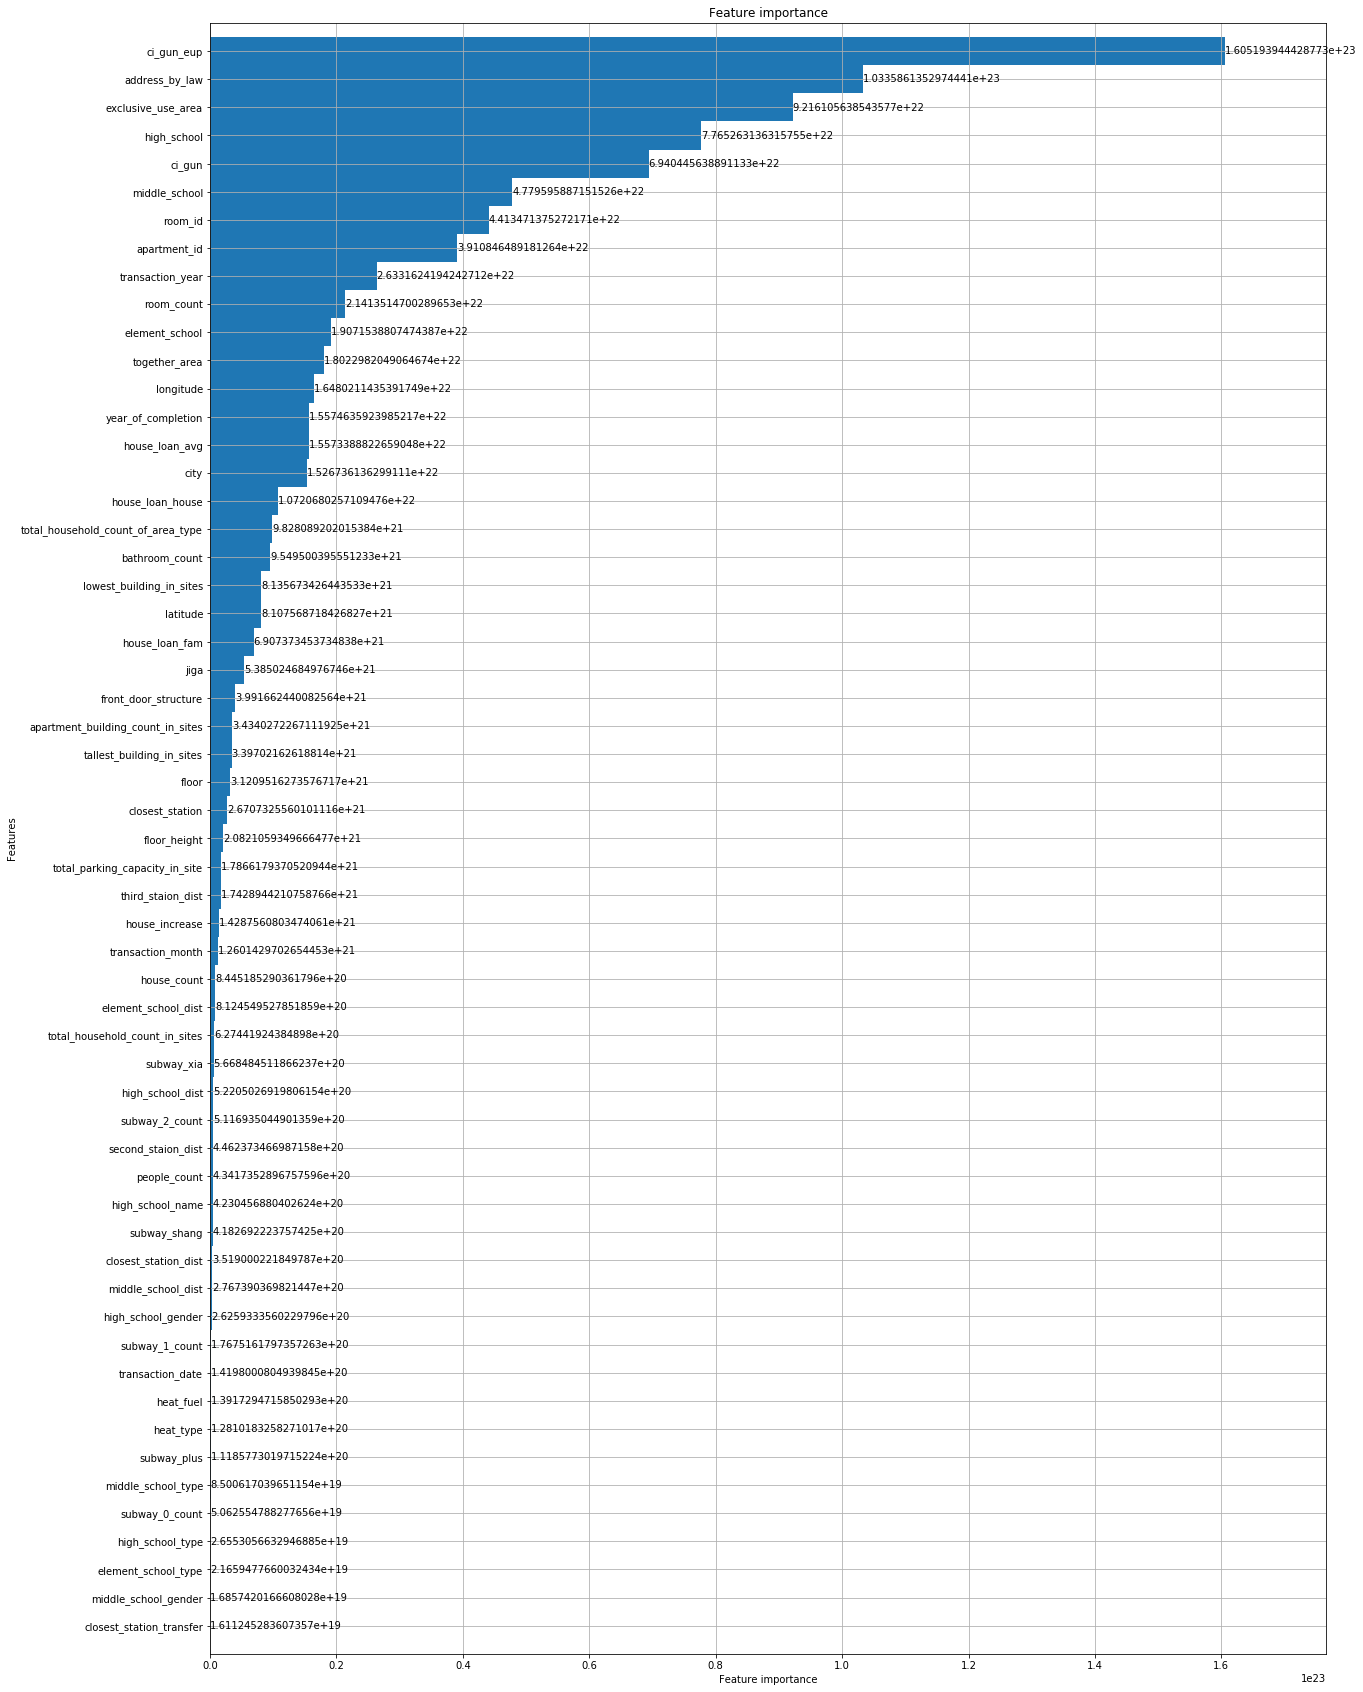

In [36]:
from matplotlib import pyplot

ax =plt.figure(figsize=(10,10))
lgb.plot_importance(clf, height =1, importance_type='gain',figsize=(20,30), grid=True)
plt.show()

# XGBoost

- Categorical variable OHE로 전처리

- Sparse Matrix로 바꿔줌

In [12]:
#'apartment_id',,'address_by_law''room_id',
category_cols = ['city','heat_type','heat_fuel','front_door_structure',
                 'closest_station','ci_gun','ci_gun_eup','element_school','middle_school','high_school', 'element_school_type',
                'middle_school_type','high_school_type','middle_school_gender','high_school_gender','high_school_name']
data_tmp = copy.deepcopy(data.iloc[:3000])
for col in category_cols:
    data_tmp = pd.concat([data_tmp,pd.get_dummies(data_tmp[col], prefix = col)],axis=1)
    data_tmp = data_tmp.drop(col,axis=1)

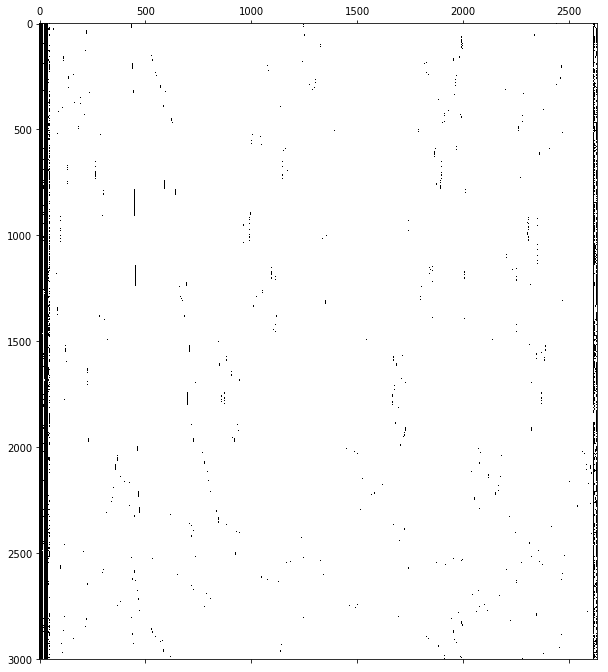

In [13]:
plt.figure(figsize = (10,20))
plt.spy(data_tmp)
plt.show()

In [14]:
#'apartment_id',,'address_by_law','room_id'
category_cols = ['city','heat_type','heat_fuel','front_door_structure',
                 'closest_station','ci_gun','ci_gun_eup','element_school','middle_school','high_school', 'element_school_type',
                'middle_school_type','high_school_type','middle_school_gender','high_school_gender','high_school_name']

data_tmp = copy.deepcopy(data)
target = data_tmp.transaction_real_price
data_tmp = data_tmp.drop('transaction_real_price', axis =1)
sdf = pd.SparseDataFrame()

for col in category_cols:
    OHE = OneHotEncoder()
    Label = LabelEncoder()
     
    OHE_tmp =Label.fit_transform(data[col])
    OHE_tmp = OHE_tmp.reshape(len(data[col]),1)
    OHE.fit(OHE_tmp )
    dataset = OHE.transform(OHE_tmp)
    dataset = pd.SparseDataFrame(dataset, columns=[col+'_{}'.format(i) for i in OHE.active_features_], default_fill_value =0)
    sdf = pd.concat([sdf,dataset], axis =1)
numerical_cols =[]
for col in data_tmp.columns:
    if data_tmp[col].dtype == 'int64' or data_tmp[col].dtype == 'float64':
        numerical_cols.append(col)

for col in numerical_cols:
    sdf[col] = data[col]

C:\Users\user\PYTHON\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\PYTHON\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\PYTHON\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version

C:\Users\user\PYTHON\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active_features_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\user\PYTHON\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\PYTHON\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function active_features_ is deprecated; The ``active

In [15]:
from scipy.sparse import coo_matrix, csr_matrix
sdf_csr = csr_matrix(sdf.to_coo())

In [19]:
train_target = target[target>0]
train_x = sdf_csr[:1601458,:]
test_x = sdf_csr[1601458:,:]

In [17]:
train_x, valid_x, train_target,valid_target=train_test_split(train_x, train_target, random_state=99)

In [51]:
train_target.describe()

count    1.601458e+06
mean     4.021752e+08
std      3.223861e+08
min      7.000000e+06
25%      1.990000e+08
50%      3.240000e+08
75%      5.000000e+08
max      8.200000e+09
Name: transaction_real_price, dtype: float64

In [20]:
train_x

<1601458x2629 sparse matrix of type '<class 'numpy.float64'>'
	with 83275816 stored elements in Compressed Sparse Row format>

In [ ]:
import xgboost as xgb
params = {'learning_rate': 0.15, 
          'max_depth':16, 
          'n_estimator':1000,
          'subsample': 0.9, 
          'num_boost_round ':10,
          'n_jobs':-1,
          'colsample_bytree': 0.7, 
          'colsample_bylevel':0.7,
          'min_child_weight':1,
          're_alpha':5,
          'reg_lambda':0,
          'objective': 'reg:linear', 
          'booster':'gbtree',
          'random_state': 99, 
          'scale_pos_weight': 1,
          'silent': True}

clf = xgb.XGBRegressor(**params)
clf.fit(train_x, np.array(train_target), eval_set = [(train_x,np.array(train_target)),(valid_x, np.array(valid_target))],
        eval_metric= 'rmse', verbose =True, early_stopping_rounds=30
         )


[0]	validation_0-rmse:4.39236e+08	validation_1-rmse:4.38678e+08
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 30 rounds.
[1]	validation_0-rmse:3.74781e+08	validation_1-rmse:3.74291e+08
[2]	validation_0-rmse:3.19834e+08	validation_1-rmse:3.194e+08
[3]	validation_0-rmse:2.72917e+08	validation_1-rmse:2.72561e+08
[4]	validation_0-rmse:2.3299e+08	validation_1-rmse:2.32653e+08
[5]	validation_0-rmse:1.99487e+08	validation_1-rmse:1.99189e+08
[6]	validation_0-rmse:1.7087e+08	validation_1-rmse:1.70616e+08
[7]	validation_0-rmse:1.46995e+08	validation_1-rmse:1.46782e+08


In [22]:
y_pred = clf.predict(test_x)
y_pred

array([8.8525082e+08, 3.6271354e+08, 1.3105048e+08, ..., 3.0649766e+08,
       4.4230262e+08, 2.1158992e+08], dtype=float32)

In [25]:
submission=pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission.csv')
submission['transaction_real_price'] =y_pred
submission.to_csv('./Desktop/Kaggle_study/Jicbang/submission_real_18.csv', index=False)

C:\Users\user\PYTHON\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


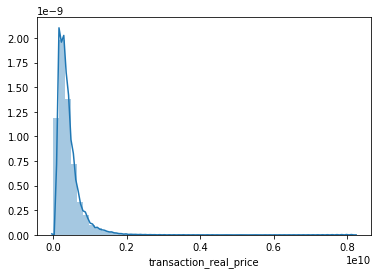

In [21]:
sns.distplot(data.loc[data.transaction_real_price>0,'transaction_real_price'])

{'boxes': [<matplotlib.lines.Line2D at 0x2b7201ee5c0>],
 'caps': [<matplotlib.lines.Line2D at 0x2b7201eefd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b7201d7c88>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b7201d7860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b7201ee710>,
  <matplotlib.lines.Line2D at 0x2b7201eeba8>]}

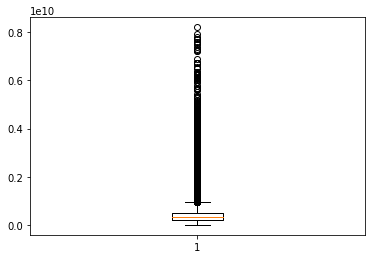

In [16]:
plt.boxplot(data.loc[data.transaction_real_price>0,'transaction_real_price'])

# 조합


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [3]:
submission=pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission.csv')
submission_2=pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission_real_10.csv')
submission_1 = pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission_real_11.csv')
submission_3 = pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission_real_12.csv')
submission_4 = pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission_real_9.csv')
submission_5 = pd.read_csv('./Desktop/Kaggle_study/Jicbang/submission_real_14.csv')


y_pred = (1.5*submission_1.transaction_real_price + submission_2.transaction_real_price + 3*submission_3.transaction_real_price
          + submission_4.transaction_real_price+ 2*submission_5.transaction_real_price)/(1.5+1+3+1+2)



In [4]:
submission['transaction_real_price'] =y_pred

submission.to_csv('./Desktop/Kaggle_study/Jicbang/submission_real_16.csv', index=False)

# Catboost

In [9]:
train_target = train_target.reset_index()
train_target=train_target.drop('index',axis=1)

train_x = train_x.reset_index()
train_x=train_x.drop('index',axis=1)

valid_x = valid_x.reset_index()
valid_x=valid_x.drop('index',axis=1)

valid_target = valid_target.reset_index()
valid_target=valid_target.drop('index',axis=1)


In [5]:
train = data.loc[data.transaction_real_price>0]
test = data.loc[data.transaction_real_price==0]
train_target = train.transaction_real_price
train_x = train.drop('transaction_real_price', axis =1)
test_target = test.transaction_real_price
test_x = test.drop('transaction_real_price', axis =1)


In [10]:
from catboost import CatBoostRegressor, CatBoostClassifier
params={
    'loss_function' :'RMSE',
   
   'eval_metric' : 'RMSE',
    'iterations' : 1000,
    'learning_rate' : 0.15,
    'random_seed' : 99,
    'l2_leaf_reg':10,
    #Bernoulli, No,Bayesian
 #   'use_best_model' : True, #validation set이 있으면 best model을 저장
    #best_model_min_trees = int값 -> use_best_model이 True이면 best model의 최소 tree 개수 값
    #'subsample':0.66,
    
    'depth' : 10, #max_depth , default가 6
    'ignored_features' : None, #무시할 feature list로 넣음
    'one_hot_max_size' : 2, #OHE의 인코딩 값이 이값 보다 작게 인코딩
    'rsm' : 0.7, #colsample_bylevel 로 각 split selection에서 column확률
    #'nan_mode' : 'Min', # nan값이 있을 때 'forbidden'은 무시, 'min or max는 data에서 작거나 큰 값 대임
    'leaf_estimation_method' : 'Gradient', # leaves 계산 방벙, Newton도 있다
    'fold_len_multiplier' : 2, #최소 split node개수
    'early_stopping_rounds':50,
    'verbose' : True,
   'thread_count': 2,
    'max_ctr_complexity':2
    
    
}

cat_model = CatBoostRegressor(**params,bootstrap_type='Bayesian')

In [11]:
cat_model.fit(train_x.iloc[:5000,],train_target[:5000],eval_set=[(valid_x,valid_target)],verbose=True,
              cat_features=[0,1,3,8,14,15,16,20,21,22,23,24,25,36,37,38,39,40,41,42,43,44])

KeyboardInterrupt: 

In [59]:
len(train_x)

1601458

In [61]:
data.transaction_real_price.tail()

1605371    0
1605372    0
1605373    0
1605374    0
1605375    0
Name: transaction_real_price, dtype: int64